In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set up visualization style
sns.set(style="whitegrid")
plt.style.use('ggplot')

In [4]:
# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep=" ", header=None)
    data.drop(columns=[26, 27], inplace=True)  # Drop unused columns
    
    # Add column names
    column_names = [
        'engine_id', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'
    ] + [f'sensor_{i}' for i in range(1, 22)]
    data.columns = column_names
    
    # Calculate Remaining Useful Life (RUL)
    data['RUL'] = data.groupby('engine_id')['cycle'].transform(max) - data['cycle']
    
    return data

In [5]:
# Load all datasets
file_paths = ['../data/train_FD001.txt', '../data/train_FD002.txt', '../data/train_FD003.txt', '../data/train_FD004.txt']
dfs = [load_and_preprocess_data(file) for file in file_paths]

/tmp/ipykernel_57554/3647141714.py:14: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data['RUL'] = data.groupby('engine_id')['cycle'].transform(max) - data['cycle']
/tmp/ipykernel_57554/3647141714.py:14: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data['RUL'] = data.groupby('engine_id')['cycle'].transform(max) - data['cycle']
/tmp/ipykernel_57554/3647141714.py:14: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data['RUL'] = data.group

In [6]:
# Combine all datasets into a single DataFrame
train_data = pd.concat(dfs, ignore_index=True)

In [7]:

# Display information about the combined dataset
print("\nDataset Information:")
train_data.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   engine_id     160359 non-null  int64  
 1   cycle         160359 non-null  int64  
 2   op_setting_1  160359 non-null  float64
 3   op_setting_2  160359 non-null  float64
 4   op_setting_3  160359 non-null  float64
 5   sensor_1      160359 non-null  float64
 6   sensor_2      160359 non-null  float64
 7   sensor_3      160359 non-null  float64
 8   sensor_4      160359 non-null  float64
 9   sensor_5      160359 non-null  float64
 10  sensor_6      160359 non-null  float64
 11  sensor_7      160359 non-null  float64
 12  sensor_8      160359 non-null  float64
 13  sensor_9      160359 non-null  float64
 14  sensor_10     160359 non-null  float64
 15  sensor_11     160359 non-null  float64
 16  sensor_12     160359 non-null  float64
 17  sensor_13     160359 non-n

In [8]:

# Summary statistics for combined dataset
print("\nSummary Statistics:")
print(train_data.describe())


Summary Statistics:
           engine_id          cycle   op_setting_1   op_setting_2  \
count  160359.000000  160359.000000  160359.000000  160359.000000   
mean      105.553758     123.331338      17.211973       0.410004   
std        72.867325      83.538146      16.527988       0.367938   
min         1.000000       1.000000      -0.008700      -0.000600   
25%        44.000000      57.000000       0.001300       0.000200   
50%        89.000000     114.000000      19.998100       0.620000   
75%       164.000000     173.000000      35.001500       0.840000   
max       260.000000     543.000000      42.008000       0.842000   

        op_setting_3       sensor_1       sensor_2       sensor_3  \
count  160359.000000  160359.000000  160359.000000  160359.000000   
mean       95.724344     485.840890     597.361022    1467.035653   
std        12.359044      30.420388      42.478516     118.175261   
min        60.000000     445.000000     535.480000    1242.670000   
25%       10

In [9]:
# Check for missing values in the combined dataset
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
RUL             0
dtype: int64


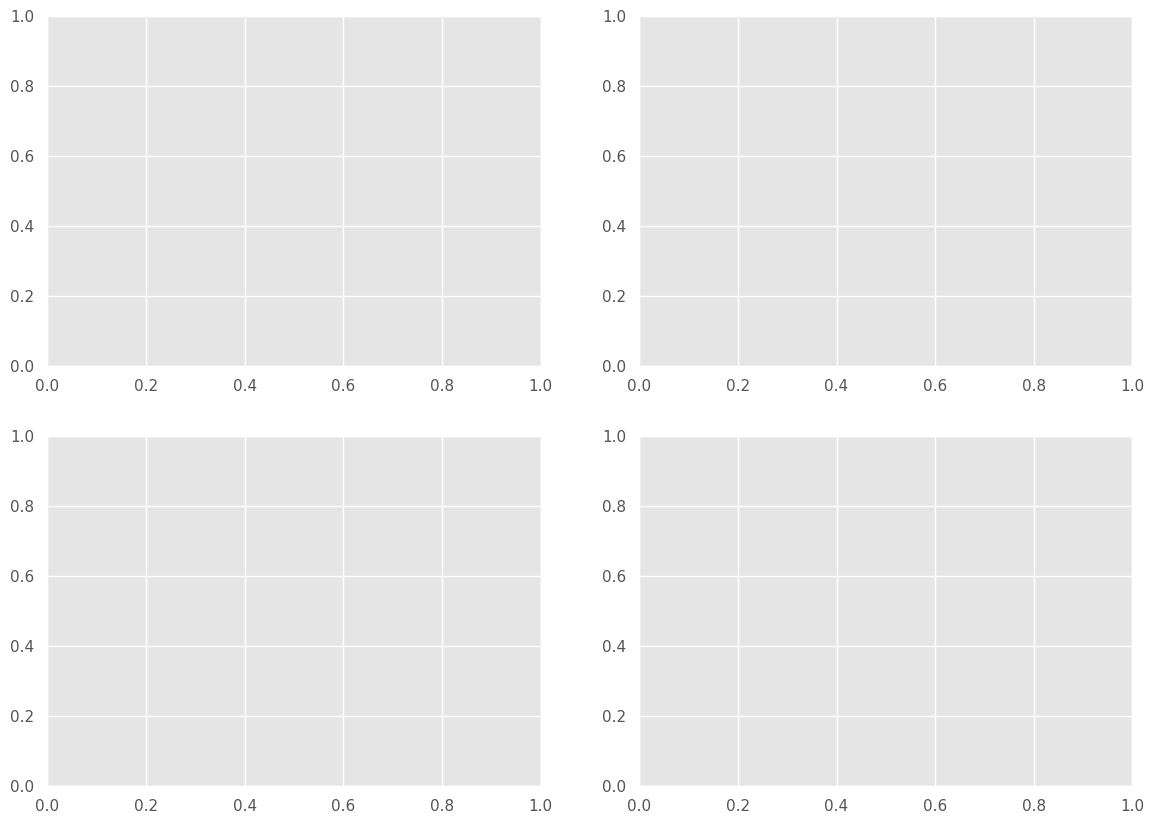

In [10]:
# Set up the subplot grid (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

In [13]:

# Plot Distribution of RUL for each dataset
for i, (df, ax) in enumerate(zip(dfs, axes.flatten())):
    sns.histplot(df['RUL'], bins=50, kde=True, color='blue', ax=ax)
    ax.set_title(f'Distribution of RUL for Engine Dataset {i+1}')
    ax.set_xlabel('RUL (Cycles)')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
# Select an engine for visualization (can be modified for any dataset)
engine_id = 1  # Choose an engine to visualize

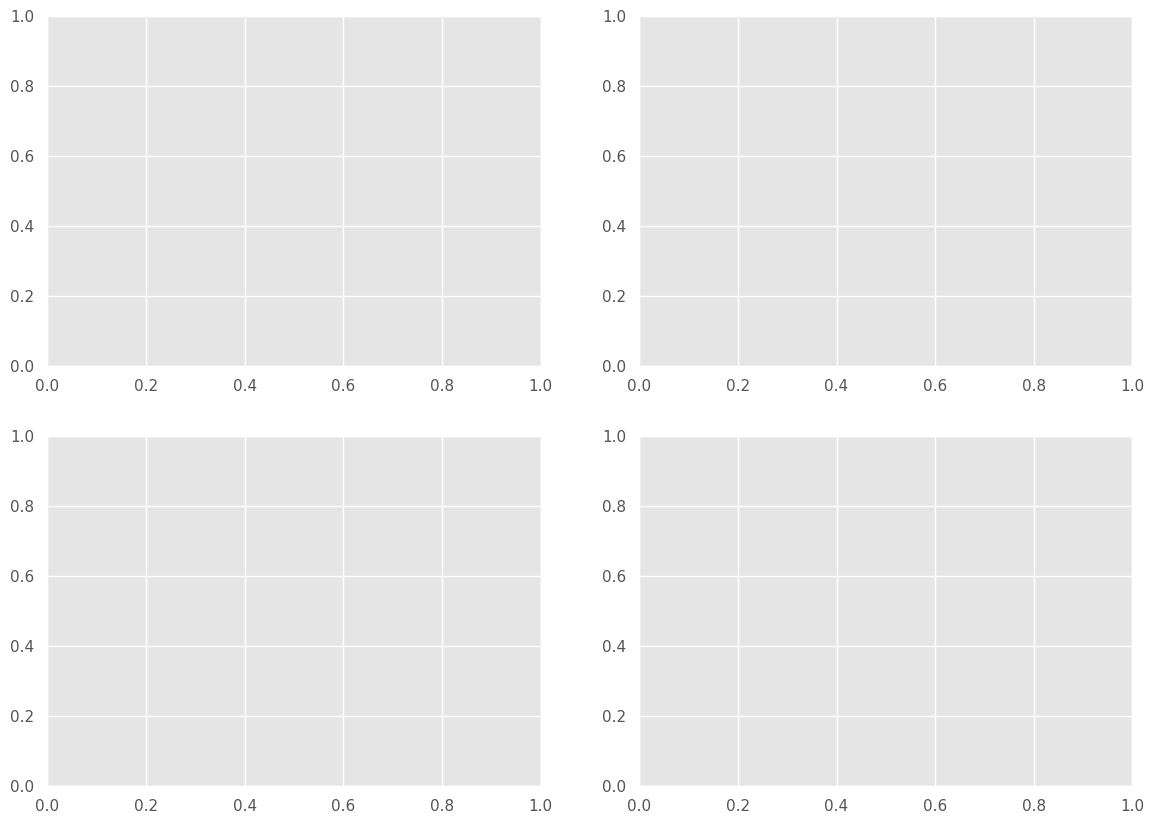

In [17]:
# Set up the subplot grid (2 rows, 2 columns) for sensor trends
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

In [18]:
# Plot sensor trends for each dataset
for i, (df, ax) in enumerate(zip(dfs, axes.flatten())):
    engine_data = df[df['engine_id'] == engine_id]
    
    for sensor in ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4']:
        ax.plot(engine_data['cycle'], engine_data[sensor], label=sensor)
    
    ax.set_title(f'Sensor Trends for Engine {engine_id} in Dataset {i+1}')
    ax.set_xlabel('Cycle')
    ax.set_ylabel('Sensor Value')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

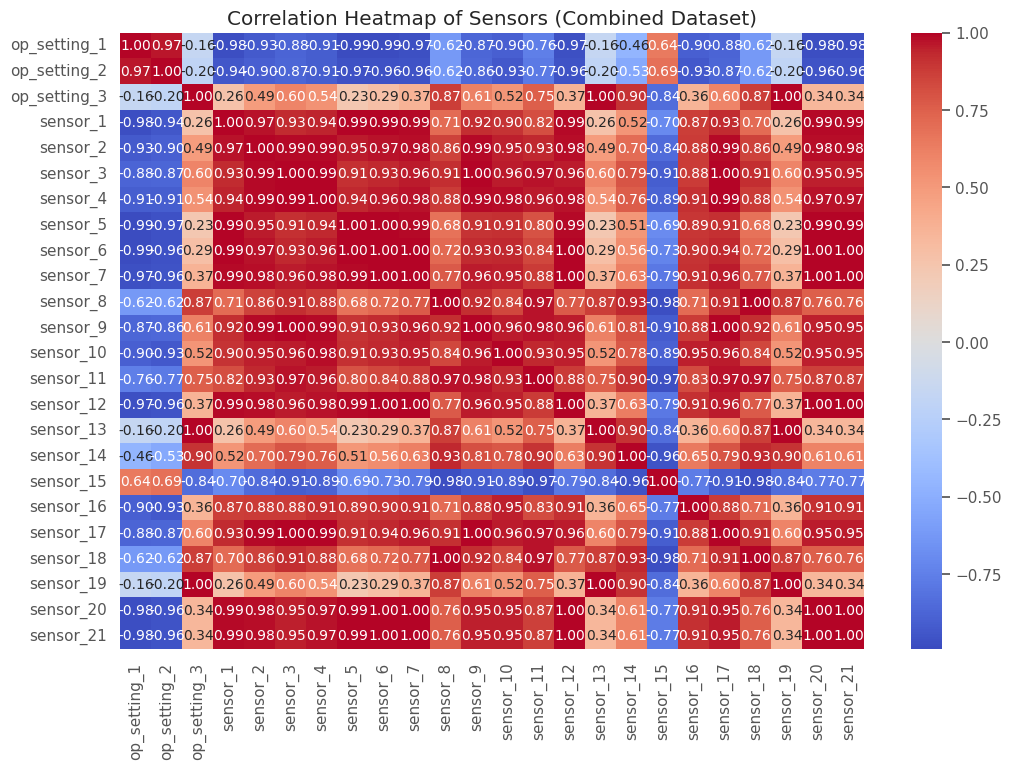

In [19]:
# Correlation heatmap of sensors for combined dataset
plt.figure(figsize=(12, 8))
corr_matrix = train_data.iloc[:, 2:26].corr()  # Correlation between sensors
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Sensors (Combined Dataset)')
plt.show()


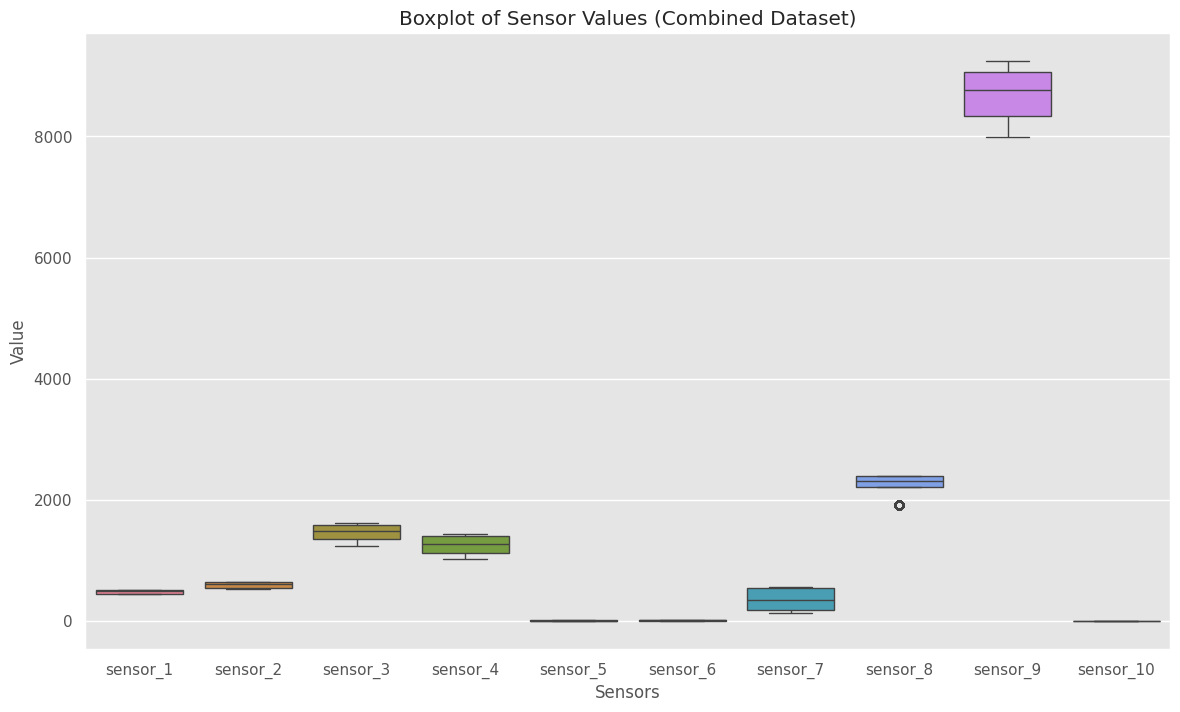

In [20]:
# Boxplot of sensor values for combined dataset
plt.figure(figsize=(14, 8))
sns.boxplot(data=train_data.iloc[:, 5:15])  # Plot first 10 sensors
plt.title('Boxplot of Sensor Values (Combined Dataset)')
plt.xlabel('Sensors')
plt.ylabel('Value')
plt.show()

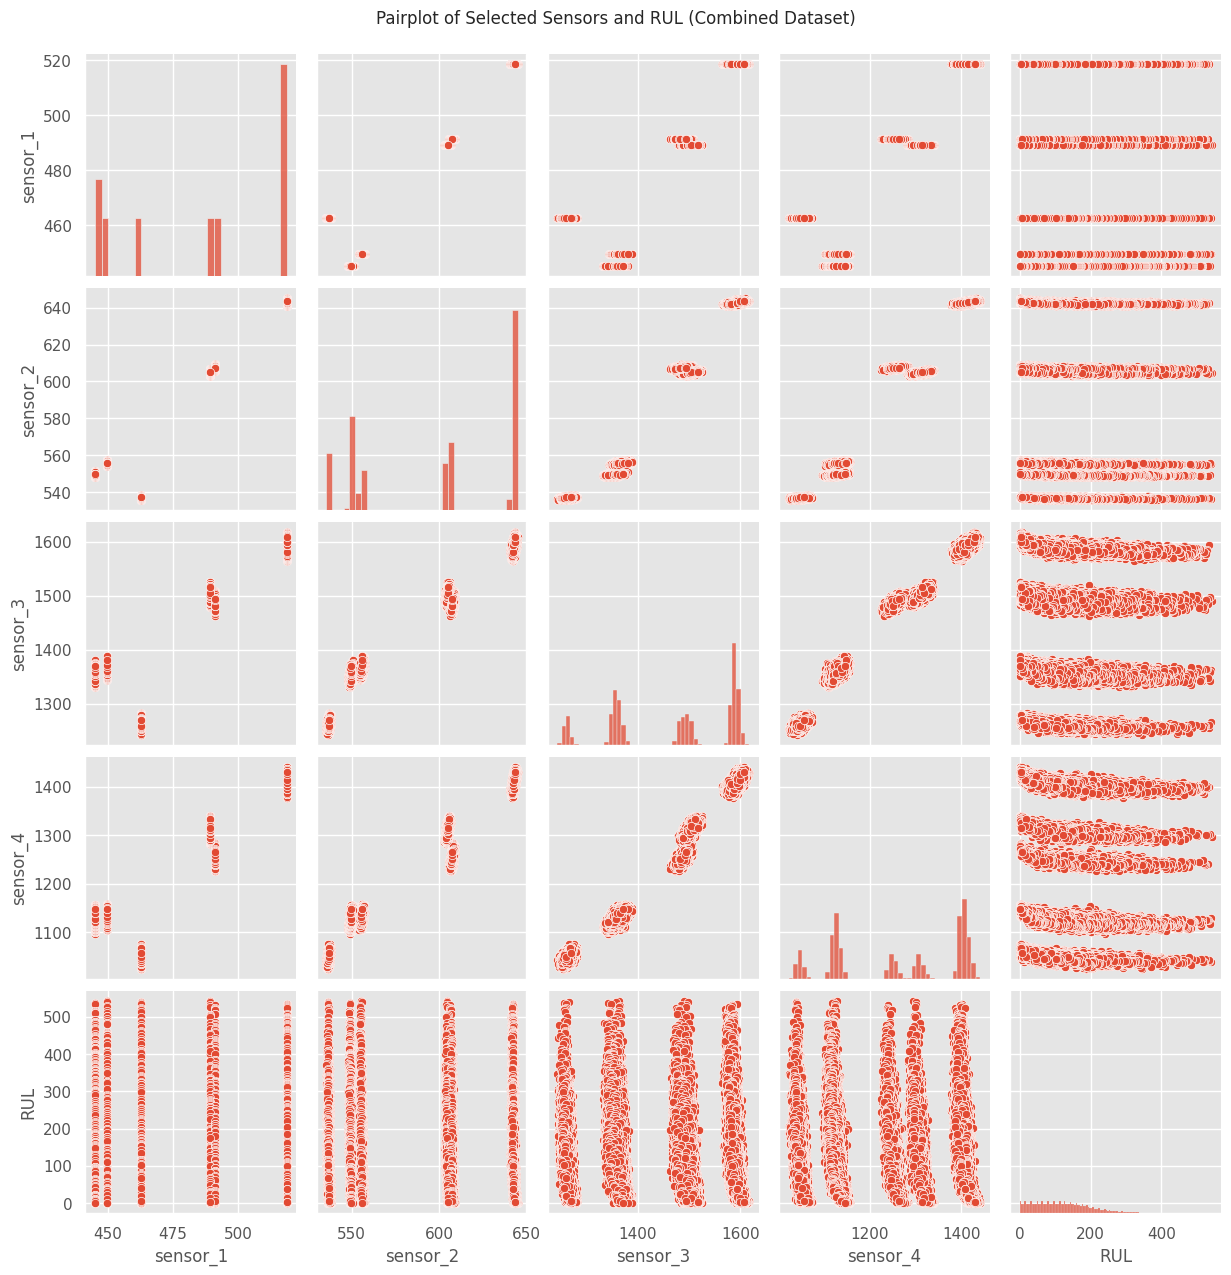

In [21]:
# Pairplot of selected sensors from the combined dataset
sns.pairplot(train_data[['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'RUL']])
plt.suptitle('Pairplot of Selected Sensors and RUL (Combined Dataset)', y=1.02)
plt.show()